In [1]:
require "narray"
require "daru"
require "gnuplotrb"
include Daru
include GnuplotRB
include Fit
nil

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

# Variables

In [2]:
nil

# Time upward

In [4]:
time_up = DataFrame.new({l: [5, 5, 10, 15, 15], t: [16, 15, 7.5, 11.2, 10.2], t_err: [1, 1, 0.2, 0.2, 0.2]})

,l,t,t_err
0,5,16,1
1,5,15,1
2,10,7.5,0.2
3,15,11.2,0.2
4,15,10.2,0.2


In [37]:
plot_up = Plot.new(
  [time_up, using: "2:3:4", with: "yerrorbars", title: ""],
  xlabel: "Length [m]",
  ylabel: "tau [s]")
nil

In [57]:
fit_up = fit_poly(time_up.row[0,1,3,4], using: "2:3:4", degree:1)
fit_up[:formula_ds].title = "l = 5m ignoriert"
puts fit_up[:formula_ds].data
fit_up[:deltas]

 17.9*x**0 + -0.48*x**1 


{:a0=>2.71, :a1=>0.1838}

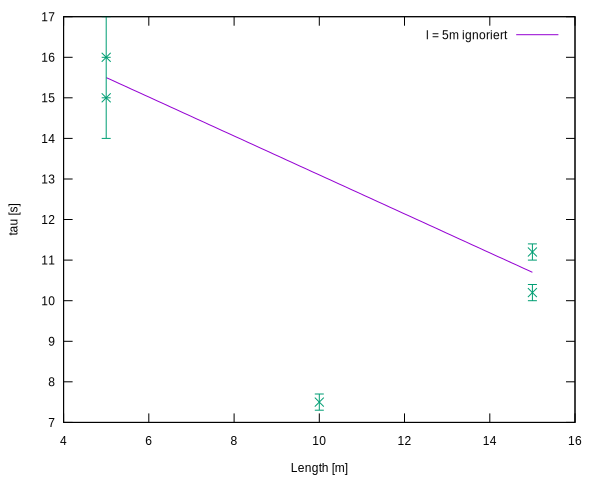

In [58]:
plot_up << fit_up[:formula_ds]

# Time downward

In [64]:
time_down = DataFrame.new({l: [5, 5, 10, 15, 15,15], t: [10.0726, 9.66115, 11.9292, 14.5618, 14.2502, 14.2057], 
  t_err: [0.4, 0.4, 1, 1, 1,1]})

,l,t,t_err
0,5,10.0726,0.4
1,5,9.66115,0.4
2,10,11.9292,1
3,15,14.5618,1
4,15,14.2502,1
5,15,14.2057,1


In [65]:
plot_down = Plot.new(
  [time_down[:l, :t, :t_err], using: "2:3:4", with: "yerrorbars", title: ""],
  xlabel: "Length [m]",
  ylabel: "tau [s]")
nil

In [66]:
fit_down = fit_poly(time_down, using: "2:3:4", degree: 1)
puts fit_down[:formula_ds].data
fit_down[:deltas]

 7.63437*x**0 + 0.44524*x**1 


{:a0=>0.2037, :a1=>0.0251}

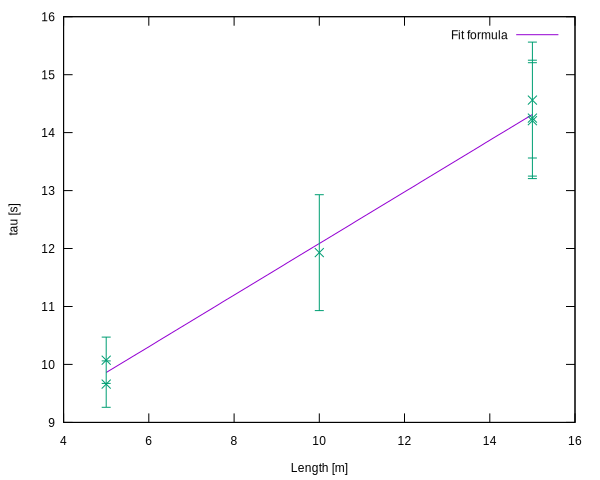

In [67]:
plot_down << fit_down[:formula_ds]

# Offset

In [22]:
offset = DataFrame.new({l: [5, 5, 10, 15, 15], c: [1.7, 1.5, 2.32, 2.59, 2.01], c_err: [0.3, 0.2, 0.08, 0.05, 0.05]},
  order: [:l, :c, :c_err])

,l,c,c_err
0,5,1.7,0.3
1,5,1.5,0.2
2,10,2.32,0.08
3,15,2.59,0.05
4,15,2.01,0.05


In [59]:
plot_offset = Plot.new(
  [offset, using: "2:3:4", with: "yerrorbars", title: ""],
  xlabel: "Length [m]",
  ylabel: "c [ppb]")
nil

In [54]:
fit_offset = fit_poly(offset.row[0..3], using: "2:3:4", degree: 1)
fit_offset[:formula_ds].title = "ohne letzten Punkt"
puts fit_offset[:formula_ds]
fit_offset[:deltas]

 1.40003*x**0 + 0.0807903*x**1  title "ohne letzten Punkt"


{:a0=>0.2785, :a1=>0.02077}

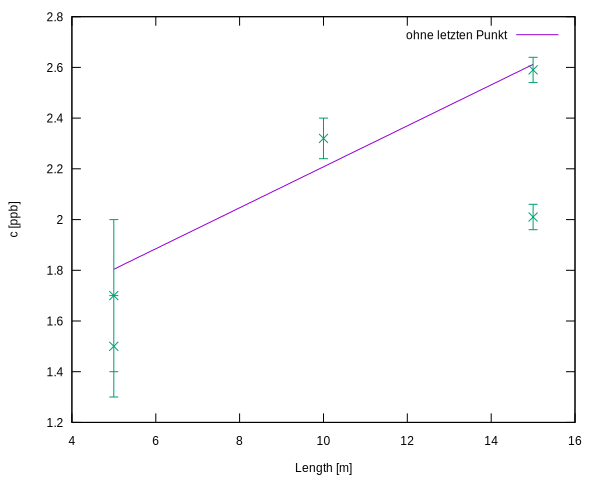

In [56]:
plot_offset << fit_offset[:formula_ds]

# Upper Plateau

In [24]:
plateau = DataFrame.new({l: [5, 5, 10, 15, 15], c: [24.03, 23.84, 23.7, 23.3, 22.7], 
  c_err: [0.05, 0.05, 0.2, 0.1, 0.1]},
  order: [:l, :c, :c_err])

,l,c,c_err
0,5,24.03,0.05
1,5,23.84,0.05
2,10,23.7,0.2
3,15,23.3,0.1
4,15,22.7,0.1


In [28]:
plot_plateau = Plot.new(
  [plateau, using: "2:3:4", with: "yerrorbars", title: ""],
  xlabel: "Length [m]",
  ylabel: "c [ppb]")
nil

In [33]:
fit_plateau = fit_poly(plateau, using: "2:3:4", degree: 1)
puts fit_plateau[:formula_ds].data
fit_plateau[:deltas]

 24.4008*x**0 + -0.0924511*x**1 


{:a0=>0.1895, :a1=>0.02335}

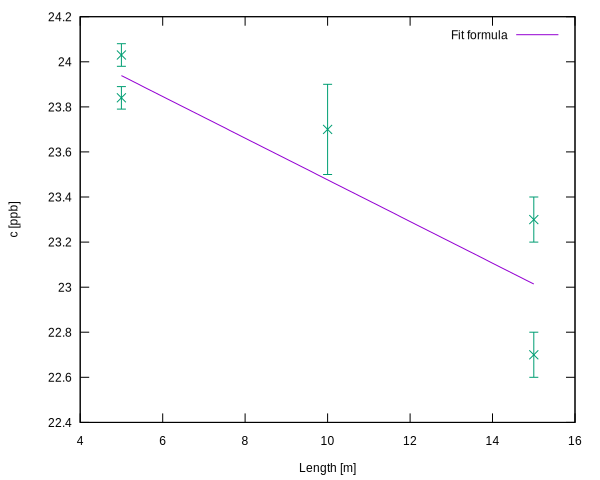

In [30]:
plot_plateau << fit_plateau[:formula_ds]